# Name: Aditya Chede
# Bharat Intern Data Science Internship
## Task: Stock Prediction
Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

### Dataset used: https://finance.yahoo.com/quote/AAPL/history/

## Importing Libraries and Data to be used

In [1]:
#Importing the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
#Importing Data
df = pd.read_csv('AAPL.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
5,19-12-1980,0.126116,0.126674,0.126116,0.126116,0.097720,48630400
6,22-12-1980,0.132254,0.132813,0.132254,0.132254,0.102476,37363200
7,23-12-1980,0.137835,0.138393,0.137835,0.137835,0.106800,46950400
8,24-12-1980,0.145089,0.145647,0.145089,0.145089,0.112421,48003200
9,26-12-1980,0.158482,0.159040,0.158482,0.158482,0.122799,55574400


## Gathering Insights

In [3]:
#Observing shape of the data
print("Shape of the data:",df.shape)

Shape of the data: (10816, 7)


In [4]:
#Observing the statistical description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10816.000000,10816.000000,10816.000000,10816.000000,10816.000000,1.081600e+04
mean,19.472251,19.688795,19.264422,19.485403,18.756964,3.224090e+08
std,40.795655,41.260665,40.364200,40.833084,40.468331,3.365670e+08
min,0.049665,0.049665,0.049107,0.049107,0.038050,0.000000e+00
25%,0.293527,0.301339,0.286551,0.294643,0.241135,1.168620e+08
50%,0.506696,0.513393,0.498605,0.506696,0.416741,2.099008e+08
75%,18.695267,18.883392,18.523393,18.706428,16.298243,4.025532e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,7.421641e+09


In [5]:
#Observing summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10816 entries, 0 to 10815
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10816 non-null  object 
 1   Open       10816 non-null  float64
 2   High       10816 non-null  float64
 3   Low        10816 non-null  float64
 4   Close      10816 non-null  float64
 5   Adj Close  10816 non-null  float64
 6   Volume     10816 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 591.6+ KB


In [6]:
#Checking the null values in the data
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## There are no null values in the data.

In [7]:
import datetime
def string_to_datetime(s):
    split = s.split('-')
    day, month, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(day=day, month=month, year=year)
date_string = '15-12-1980'
datetime_object = string_to_datetime(date_string)
datetime_object
    

datetime.datetime(1980, 12, 15, 0, 0)

In [8]:
import pandas as pd

df = df[['Date', 'Open', 'Close']] #Extracting required columns
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') #Converting object dtype of date column to datetime
df.set_index('Date', drop=True, inplace=True) #Setting date column as index

df.head()


,Open,Close
Date,,
1980-12-12,0.128348,0.128348
1980-12-15,0.122210,0.121652
1980-12-16,0.113281,0.112723
1980-12-17,0.115513,0.115513
1980-12-18,0.118862,0.118862


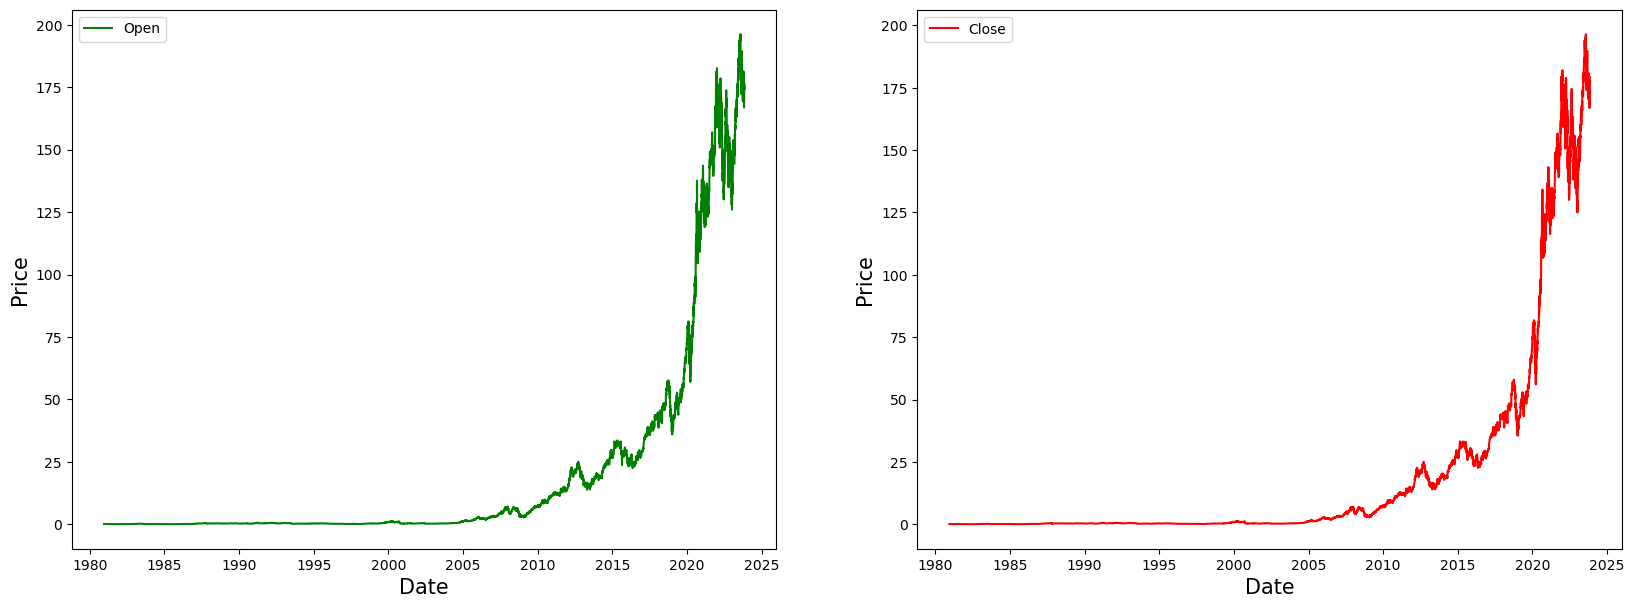

In [9]:
# Plotting opening and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## Data Preprocessing

In [10]:
# Normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
1980-12-12,0.000401,0.000403
1980-12-15,0.000370,0.000369
1980-12-16,0.000324,0.000324
1980-12-17,0.000336,0.000338
1980-12-18,0.000353,0.000355
1980-12-19,0.000390,0.000392
1980-12-22,0.000421,0.000423
1980-12-23,0.000449,0.000452
1980-12-24,0.000486,0.000489


In [11]:
# Splitting the data into training and test set
training_size = round(len(df) * 0.75)
training_size

8112

In [12]:
train_data = df[:training_size]
test_data = df[training_size:]

train_data.shape, test_data.shape

((8112, 2), (2704, 2))

In [13]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
    sequences = []
    labels = []
    
    start_idx = 0
    
    for stop_idx in range(50,len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

In [14]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((8062, 50, 2), (8062, 2), (2654, 50, 2), (2654, 2))

## Creating LSTM Model

In [15]:
# Imported Sequential from keras.models 
# Imported Dense, Dropout, LSTM, Bidirectional from keras.layers 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1],train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Fitting the model by iterating the dataset over 50 times(50 epochs)
model.fit(train_seq, train_label, epochs=50, validation_data=(test_seq, test_label), verbose=1)

Epoch 1/50
252/252 [==============================] - 12s 34ms/step - loss: 3.1722e-05 - mean_absolute_error: 0.0019 - val_loss: 0.0073 - val_mean_absolute_error: 0.0525
Epoch 2/50
252/252 [==============================] - 7s 30ms/step - loss: 2.5568e-06 - mean_absolute_error: 9.2586e-04 - val_loss: 0.0050 - val_mean_absolute_error: 0.0418
Epoch 3/50
252/252 [==============================] - 7s 29ms/step - loss: 2.7641e-06 - mean_absolute_error: 0.0010 - val_loss: 0.0055 - val_mean_absolute_error: 0.0446
Epoch 4/50
252/252 [==============================] - 8s 30ms/step - loss: 2.7870e-06 - mean_absolute_error: 0.0010 - val_loss: 0.0059 - val_mean_absolute_error: 0.0473
Epoch 5/50
252/252 [==============================] - 7s 30ms/step - loss: 2.2873e-06 - mean_absolute_error: 8.9701e-04 - val_loss: 0.0062 - val_mean_absolute_error: 0.0486
Epoch 6/50
252/252 [==============================] - 8s 31ms/step - loss: 2.1466e-06 - mean_absolute_error: 9.3085e-04 - val_loss: 0.0036 - val_m

In [17]:
# Predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

83/83 [==============================] - 2s 11ms/step


array([[0.07373054, 0.07304645],
       [0.0741194 , 0.07344321],
       [0.07487187, 0.07420773],
       [0.07575753, 0.0751069 ],
       [0.07709417, 0.0764563 ]], dtype=float32)

In [18]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[14.514886, 14.395495],
       [14.591175, 14.473419],
       [14.738803, 14.623571],
       [14.912561, 14.800168],
       [15.174796, 15.065192]], dtype=float32)

## Visualising Actual Data vs Predicted Data

In [23]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-2654:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],
index=df.iloc[-2654:].index)], axis=1)

In [24]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2013-04-24,14.055000,14.480714,14.514886,14.395495
2013-04-25,14.686786,14.585000,14.591175,14.473419
2013-04-26,14.636071,14.900000,14.738803,14.623571
2013-04-29,15.016071,15.361429,14.912561,14.800168
2013-04-30,15.539286,15.813571,15.174796,15.065192


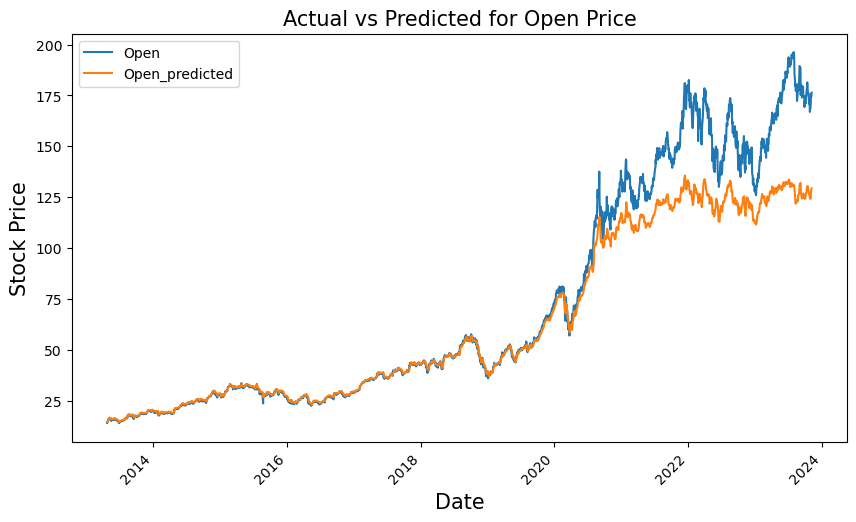

In [25]:
# Plotting the actual opening and predicted opening prices on date index
df_merge[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price',size=15)
plt.show()

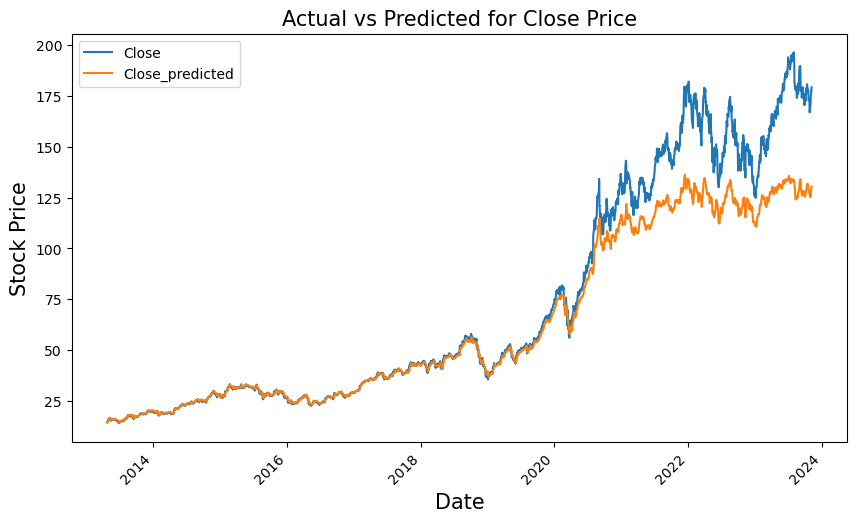

In [26]:
# Plotting the actual closing and predicted closing prices on date index 
df_merge[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price',size=15)
plt.show()

## Predicting upcoming 10 days

In [45]:
# Creating a dataframe and adding 10 days to existing index 
import pandas as pd

df_empty = pd.DataFrame(columns=df_merge.columns, index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D'))

df_merge = pd.concat([df_merge, df_empty])

# Filter the DataFrame based on the date range
result = df_merge['2023-11-04':'2023-11-13']
result

,Open,Close,Open_predicted,Close_predicted
2023-11-06,176.380005,179.229996,129.339645,130.395752
2023-11-06,NaN,NaN,NaN,NaN
2023-11-07,NaN,NaN,NaN,NaN
2023-11-08,NaN,NaN,NaN,NaN
2023-11-09,NaN,NaN,NaN,NaN
2023-11-10,NaN,NaN,NaN,NaN
2023-11-11,NaN,NaN,NaN,NaN
2023-11-12,NaN,NaN,NaN,NaN
2023-11-13,NaN,NaN,NaN,NaN


In [46]:
# Creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [47]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 49ms/step


In [48]:
# Inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

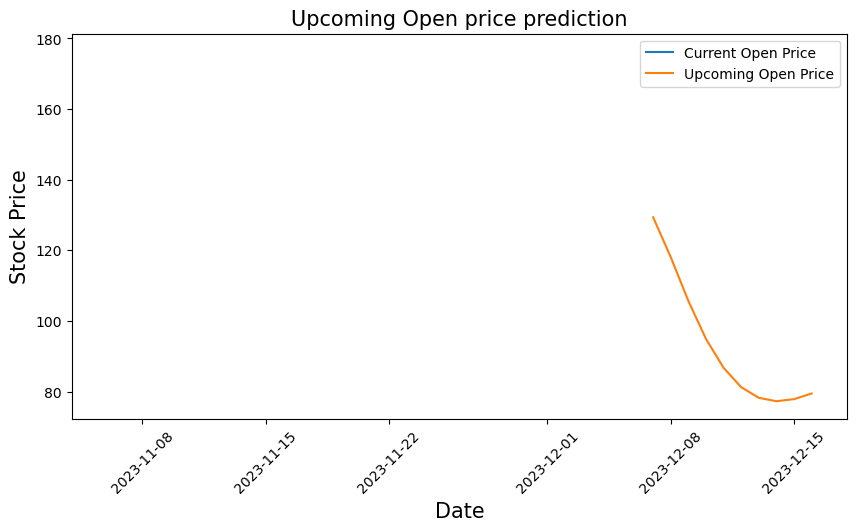

In [49]:
# Plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-11-06':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-11-06':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

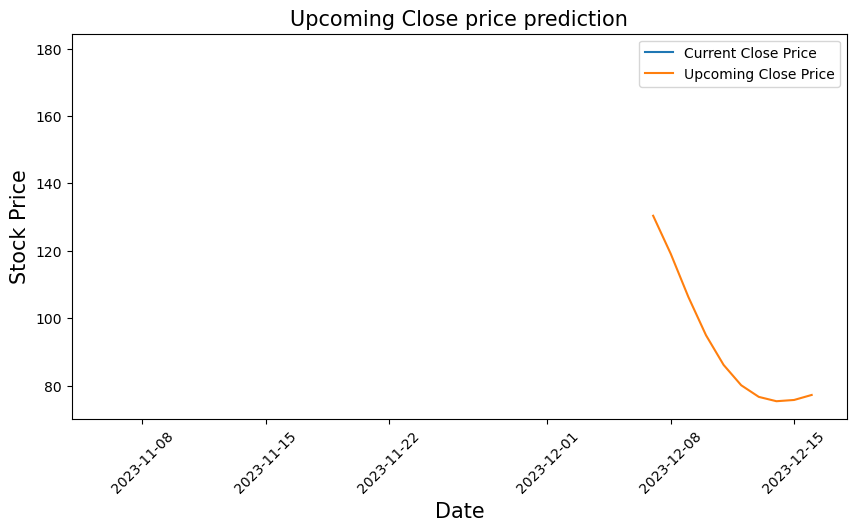

In [50]:
# Plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-11-06':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2023-11-06':,'Close'],label='Upcoming Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Close price prediction',size=15)
ax.legend()
fig.show()

## Thank You